In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('heights12.csv')
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


PLOTTING HISTOGRAM TO UNDERSTAND DATA DISTRIBUTION

Text(0, 0.5, 'Count')

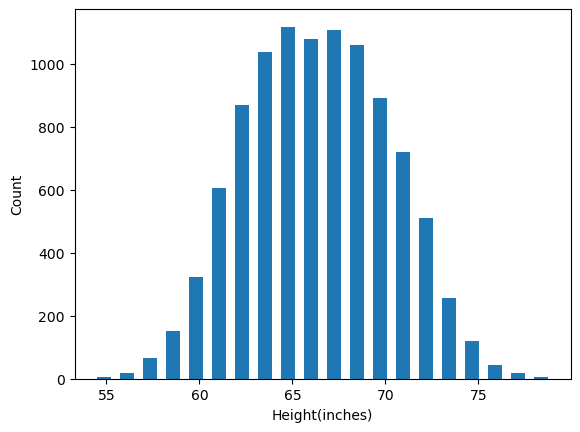

In [11]:
plt.hist(df.height,bins=20,rwidth=0.6)
plt.xlabel('Height(inches)')
plt.ylabel('Count')


The above histogram is an BELL CURVE. And that means the majority of the values are centred at the mean

# PLOTTING THE BELL CURVE 

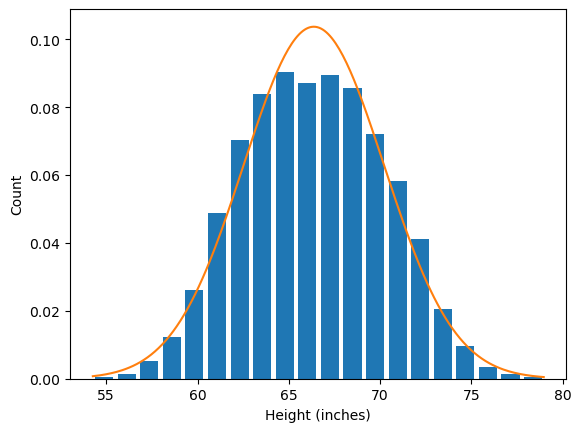

In [14]:
from scipy.stats import norm
#CODE FOR PLOTTING THE REGULAR HISTOGRAM.
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

# THIS CODE IS THE CODDE FOR BELL CURVE 
rng = np.arange(df.height.min(), df.height.max(), 0.1)
#THE ABOVE CODE TELLS THE MINIMUM AND THE MAXIMUM HEIGHT USING THE FUNCTION
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

FINDING MEAN AND STANDARD DEIVATION

In [15]:
df['height'].mean()

66.367559754866

In [17]:
df['height'].std()

3.847528120795573

REMEBER THE STANDARD DEIVATION OF BELL CURVE IS 68% , 954% AND 99.7% AS SEEN ABOVE

USING 3 STANDARD DEVIATION FOR REMOVING THE OUTLIERS

In [20]:
upper_limit = df['height'].mean() + 3*df['height'].std()
upper_limit

77.91014411725271

In [21]:
lower_limit=df['height'].mean() - 3*df['height'].std()
lower_limit

54.824975392479274

NOW THE HEIGHTS  BELOW THE LOWER LIMIT AND HEIGHTS ABOVE THE UPPER LIMIT ARE CONSIDERED AS THE OUTLIERS.


In [22]:
df[(df['height']>upper_limit) | (df['height']<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


REMOVING THE OUTLIERS

In [23]:
df_new=df[(df['height']<upper_limit) & (df['height']>lower_limit)]
df_new

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [24]:
print("The rows and columns size before outlier removal is :",df.shape)
print("The rows and columns size after outlier removal is :",df_new.shape)

The rows and columns size before outlier removal is : (10000, 2)
The rows and columns size after outlier removal is : (9993, 2)


# USING ZSCORE

ZSCORE TELLS HOW MANY STANDARD DEVIATION ARE YOU FROM THE MEAN

In [26]:
df['Zscore'] = (df.height - df.height.mean())/df.height.std()
#FORMULA FOR Zscore
df

,gender,height,Zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


# Exercise: Outlier removal using standard deviation and z score


You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [28]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [29]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [30]:
df.price_per_sqft.describe()


count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

Also plot histogram to see how is the data distribution



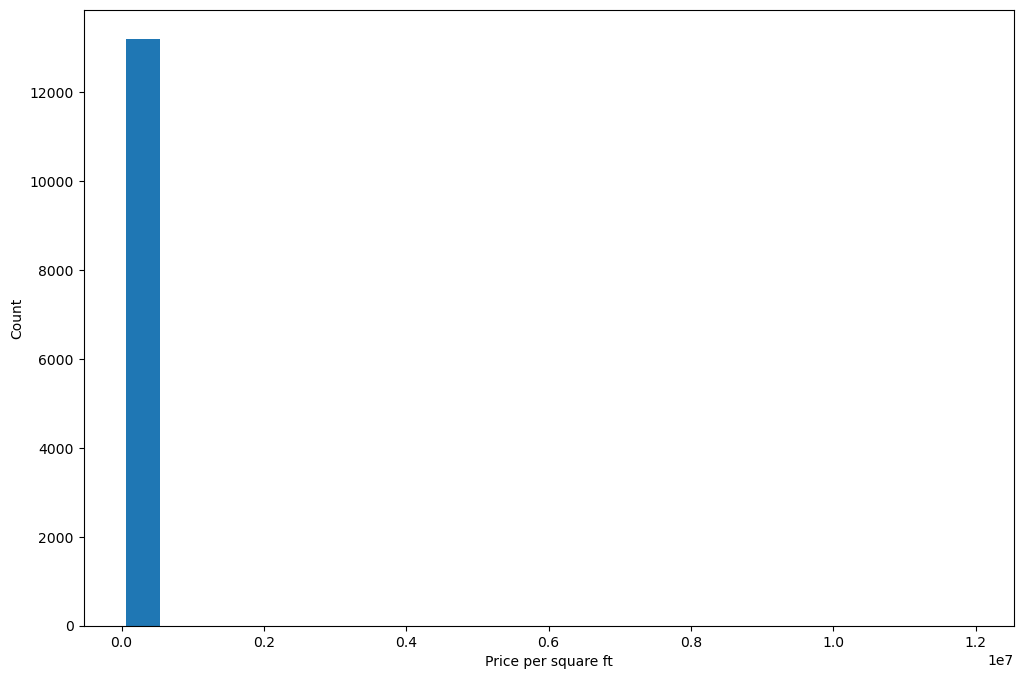

In [31]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using log scale can make visualization little better

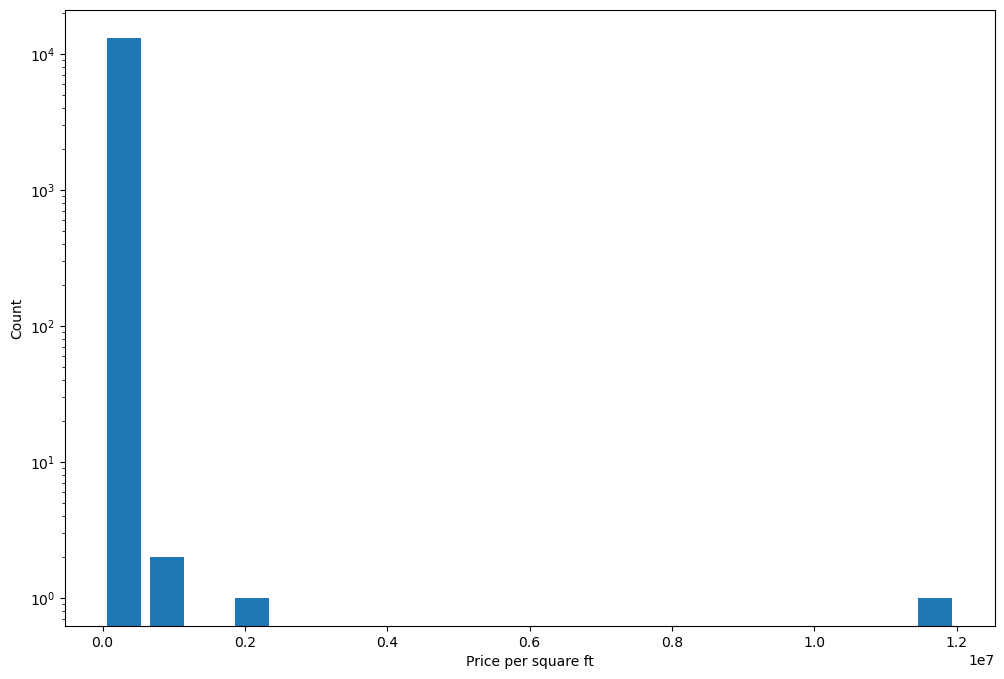

In [32]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

# (1) Treat outliers using percentile first


In [33]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [37]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
12355,other,4 BHK,16335.0,4.0,149.0,4,912
5343,other,9 BHK,42000.0,8.0,175.0,9,416
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
7575,other,1 BHK,425.0,1.0,750.0,1,176470


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [38]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [39]:
df.shape[0] - df2.shape[0]


28

We removed total 28 outliers



# (2) Now remove outliers using 4 standard deviation


In [40]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [41]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
5909,other,5 Bedroom,1240.00,5.0,300.0,5,24193
10972,other,4 BHK,8321.00,5.0,2912.0,4,34995
10327,Cunningham Road,4 Bedroom,7500.00,6.0,1800.0,4,24000
9099,Whitefield,3 BHK,1496.00,2.0,718.0,3,47994
7561,KR Puram,8 Bedroom,1500.00,7.0,382.0,8,25466
5639,other,3 BHK,2777.29,5.0,650.0,3,23404
8082,Nagarbhavi,4 Bedroom,1200.00,3.0,340.0,4,28333
12393,Electronic City Phase II,1 BHK,1200.00,1.0,295.0,1,24583
8454,other,3 Bedroom,7800.00,3.0,2000.0,3,25641
9290,other,4 Bedroom,2400.00,3.0,750.0,4,31250


In [42]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [43]:
df2.shape[0]-df3.shape[0]


125

In this step we removed total 125 outliers



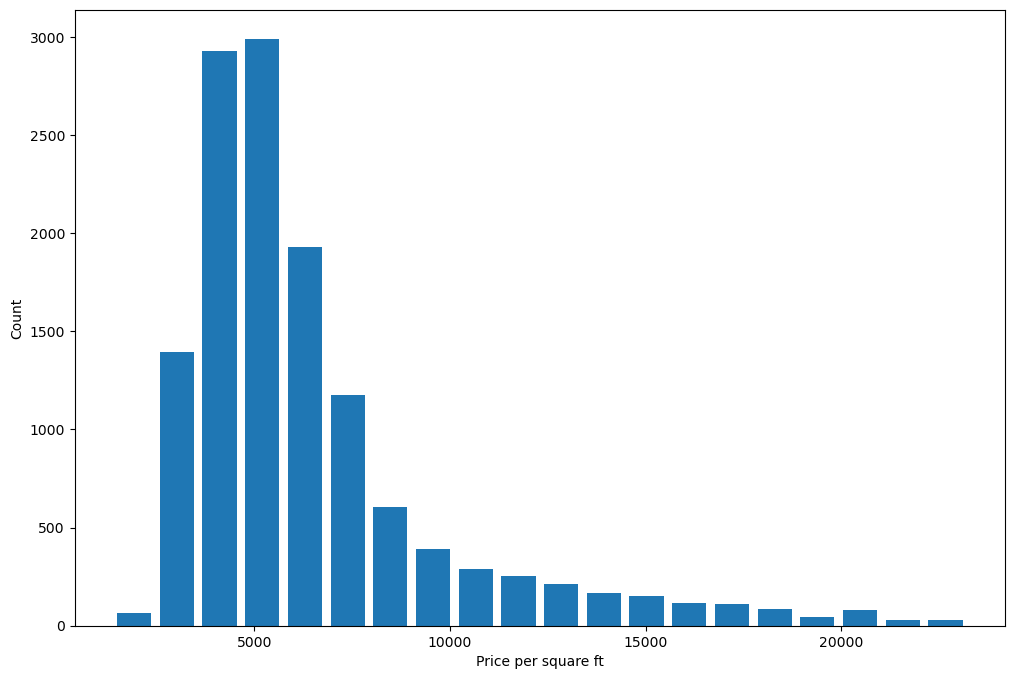

In [45]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

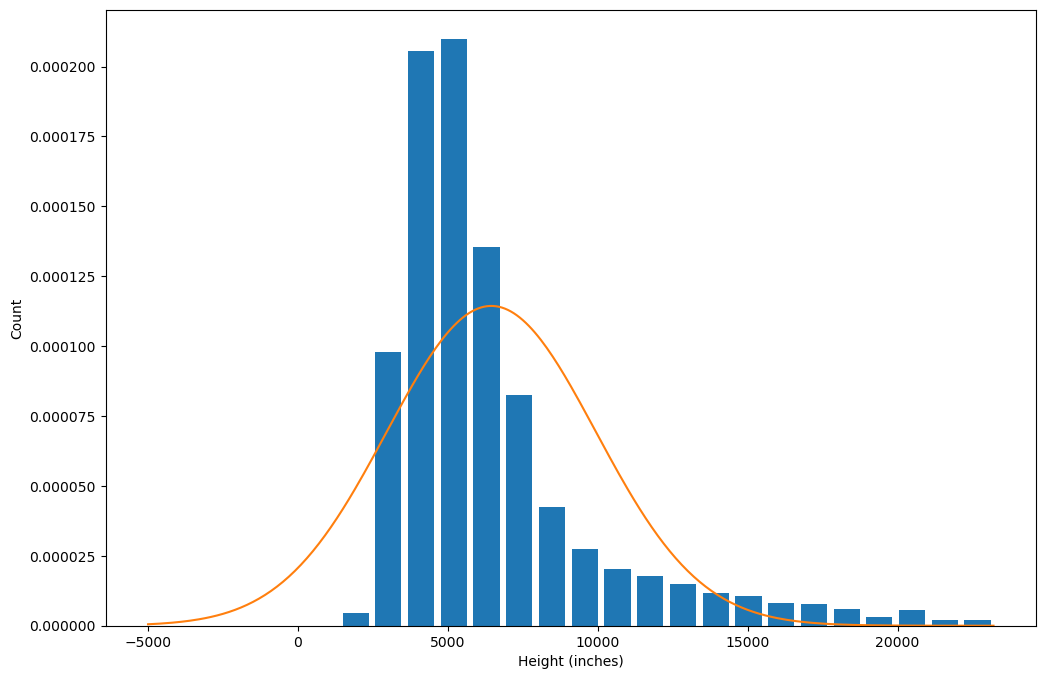

In [46]:

from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

# (3) Now remove outliers using z score. Use z score of 4 as your thresold


In [47]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\User\AppData\Local\Temp\ipykernel_17556\722868599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
13007,Akshaya Nagar,4 Bedroom,1200.00,4.0,125.00,4,10416,0.906140
12880,Jalahalli,2 BHK,1701.00,2.0,145.00,2,8524,0.449248
2009,other,1 BHK,581.91,2.0,25.00,1,4296,-0.571756
13135,Marathahalli,2 BHK,1146.00,2.0,69.00,2,6020,-0.155434
5934,Kanakpura Road,3 BHK,1843.00,3.0,85.00,3,4612,-0.495446
795,HBR Layout,4 Bedroom,675.00,3.0,59.00,4,8740,0.501409
9099,Whitefield,3 BHK,1496.00,2.0,718.00,3,47994,9.980715
1414,Horamavu Banaswadi,2 BHK,1156.00,2.0,46.00,2,3979,-0.648307
5801,Kanakpura Road,3 BHK,1495.00,2.0,52.33,3,3500,-0.763979
7881,Sahakara Nagar,3 Bedroom,2400.00,3.0,270.00,3,11250,1.107540


In [48]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape



(125, 8)

In [49]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [50]:
df2.shape[0] - df4.shape[0]


125

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('heights13.csv')
df